<a href="https://colab.research.google.com/github/drskprabhakar/AI-ML-DL-colab-notebooks-coding-models/blob/main/sia_app_cal_app_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_excel("/content/drive/MyDrive/corrected SIA app and SIA calculator magnitude axis.xlsx")


In [ ]:
df.shape

(107, 4)

In [ ]:
df.head()

,appmagnitude,calculatormagnitude,appaxis,calculatoraxis
0,0.36,1.04,1.290,105
1,2.07,3.42,4.010,68
2,2.47,1.75,0.076,155
3,0.51,1.47,1.640,50
4,0.71,1.26,0.629,141


In [ ]:
df.tail()

,appmagnitude,calculatormagnitude,appaxis,calculatoraxis
102,0.170,0.49,0.328,59
103,0.530,1.00,0.921,84
104,1.056,0.83,0.654,83
105,1.247,1.65,1.508,87
106,0.530,0.56,0.330,33


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   appmagnitude         107 non-null    float64
 1   calculatormagnitude  107 non-null    float64
 2   appaxis              107 non-null    float64
 3   calculatoraxis       107 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 3.5 KB


In [ ]:
df.describe()

,appmagnitude,calculatormagnitude,appaxis,calculatoraxis
count,107.000000,107.000000,107.000000,107.000000
mean,1.314382,1.490467,1.515748,91.728972
std,1.638689,1.096741,1.854832,37.272725
min,0.000000,0.170000,0.000000,1.000000
25%,0.353500,0.785000,0.497000,64.000000
50%,0.870000,1.260000,1.060000,88.000000
75%,1.580000,1.865000,1.889500,119.500000
max,9.000000,6.530000,15.710000,179.000000


<Axes: >

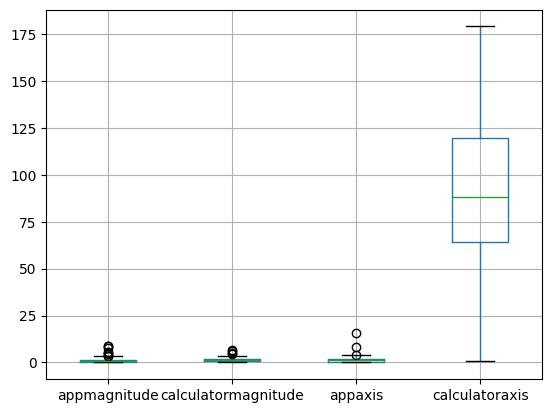

In [ ]:
df.boxplot()

<Axes: >

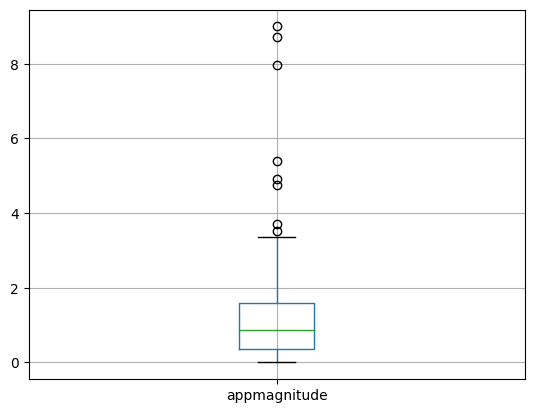

In [ ]:
df.boxplot("appmagnitude")

<Axes: >

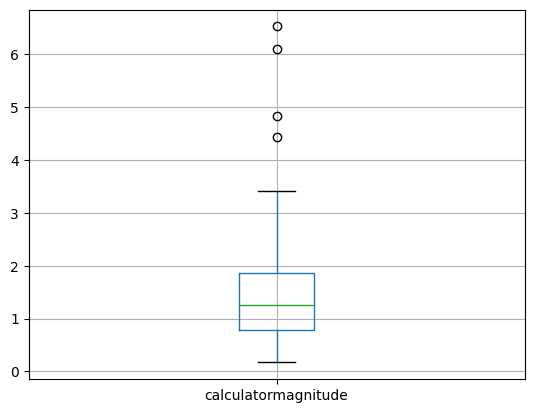

In [ ]:
df.boxplot("calculatormagnitude")

<Axes: >

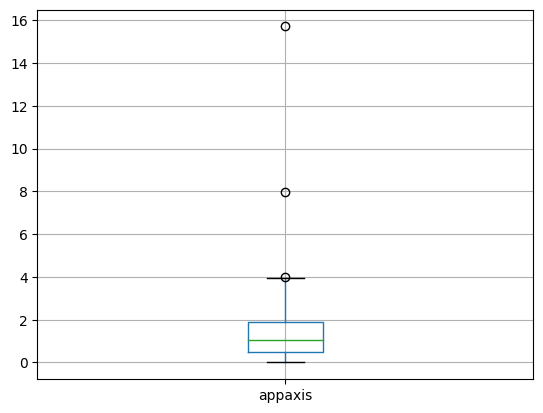

In [ ]:
df.boxplot("appaxis")

<Axes: >

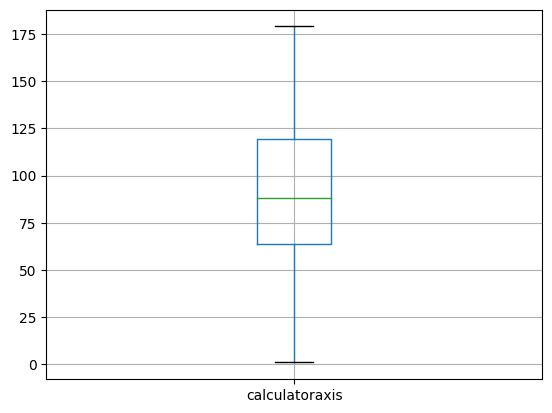

In [ ]:
df.boxplot('calculatoraxis')

array([[<Axes: title={'center': 'appmagnitude'}>,
        <Axes: title={'center': 'calculatormagnitude'}>],
       [<Axes: title={'center': 'appaxis'}>,
        <Axes: title={'center': 'calculatoraxis'}>]], dtype=object)

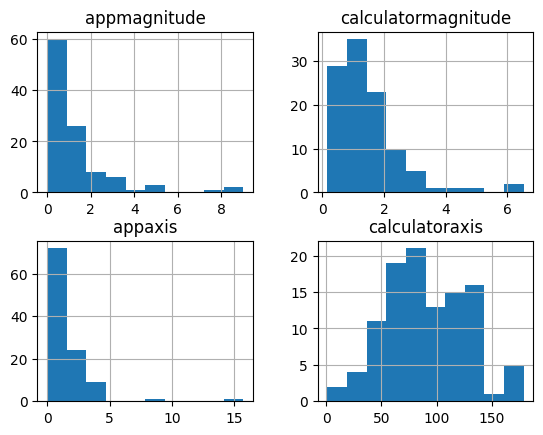

In [ ]:
df.hist()

In [ ]:
df.corr()

,appmagnitude,calculatormagnitude,appaxis,calculatoraxis
appmagnitude,1.000000,0.377480,0.504570,-0.126856
calculatormagnitude,0.377480,1.000000,0.641810,0.001962
appaxis,0.504570,0.641810,1.000000,-0.076226
calculatoraxis,-0.126856,0.001962,-0.076226,1.000000


<Axes: >

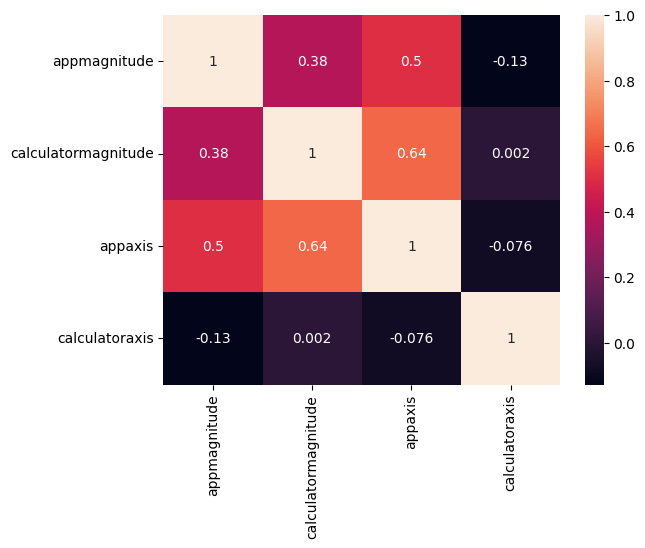

In [ ]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, annot=True)

<Axes: >

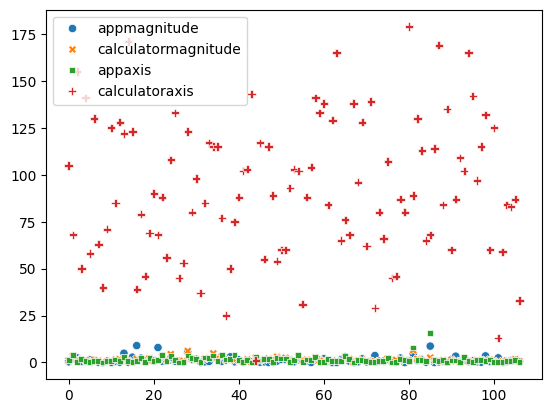

In [ ]:
sns.scatterplot(df)

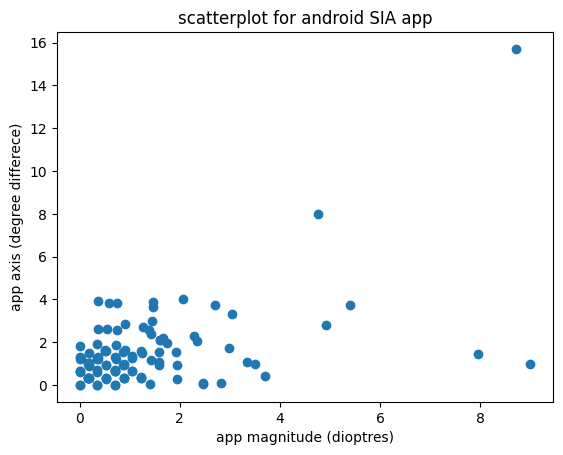

In [ ]:
import matplotlib.pyplot as plt
x = df['appmagnitude']
y = df['appaxis']
plt.title('scatterplot for android SIA app')
plt.xlabel('app magnitude (dioptres)')
plt.ylabel('app axis (degree differece)')
plt.scatter(x,y)


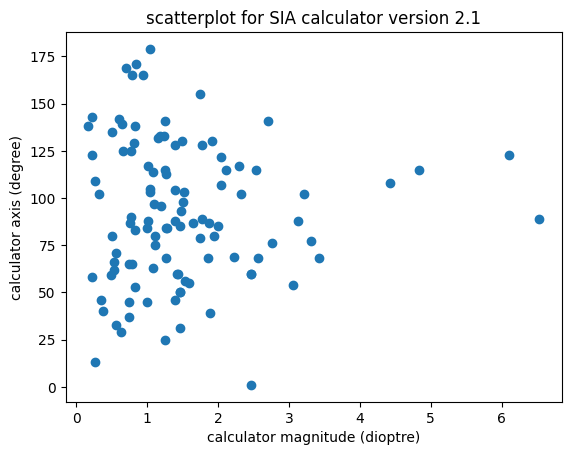

In [ ]:
x = df['calculatormagnitude']
y = df['calculatoraxis']
plt.title('scatterplot for SIA calculator version 2.1')
plt.xlabel('calculator magnitude (dioptre)')
plt.ylabel('calculator axis (degree)')
plt.scatter(x,y)